## Introducción

En el Prefacio del apunte anterior mencionamos lo siguiente sobre el principio de herencia:

> * **Herencia:** permite crear nuevas clases a partir de otras ya existentes, reutilizando su comportamiento y ampliándolo o modificándolo según sea necesario.

Supongamos que necesitamos representar rectángulos en Python.
Anteriormente, optamos por por representarlos con una tupla de longitud dos, donde el primer elemento representaba la base y el segundo la altura.
Ahora, que ya dimos nuestros primeros pasos con la programación orientada a objetos, podemos crear una clase que no solo nos permite almacenar estado (los atributos de cada rectángulo),
sino que nos posibilta implementar métodos que nos permiten obtener otras cantidades de interés.

In [1]:
class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    @property
    def area(self):
        return self.base * self.altura

    @property
    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

In [2]:
r1 = Rectangulo(4, 7)
print(r1.resumen())
print("Área:", r1.area)
print("Perímetro:", r1.perimetro)

Rectangulo(base=4, altura=7)
Área: 28
Perímetro: 22


Si queremos representar cuadrados, podemos crear otra clase:

In [3]:
class Cuadrado:
    def __init__(self, lado):
        self.lado = lado

    @property
    def area(self):
        return self.lado * self.lado

    @property
    def perimetro(self):
        return self.lado * 4

    def resumen(self):
        return f"Cuadrado(lado={self.lado})"

c1 = Cuadrado(3)
print(c1.resumen())
print("Área:", c1.area)
print("Perímetro:", c1.perimetro)

Cuadrado(lado=3)
Área: 9
Perímetro: 12


En Python podemos usar la función `isinstance` para verificar si un objeto es instancia de una clase determinada.
Por ejemplo, en el siguiente código comprobamos que `r1` es una instancia de `Rectangulo` y que `c1` es una instancia de `Cuadrado`:

In [4]:
print(isinstance(r1, Rectangulo))
print(isinstance(c1, Cuadrado))

True
True


Sabemos que, desde el punto de vista geométrico, un cuadrado es un caso particular de rectángulo: tiene base y altura iguales.
En otras palabras, todo cuadrado es también un rectángulo, aunque no todo rectángulo sea un cuadrado.

Sin embargo, si intentamos verificar esta relación en nuestro programa, obtenemos que esto no es asi.

In [5]:
isinstance(c1, Rectangulo)

False

Esto no significa que los cuadrados no sean rectángulos, sino que nuestro código aún no conoce esa relación entre las clases.

## Herencia simple

La herencia simple, como su nombre indica, es la forma más básica de herencia en programación orientada a objetos.
Ocurre cuando una clase (que llamaremos hija, del inglés _child_) hereda de una única clase (que llamaremos padre, del inglés _parent_).
Al hacerlo, la clase hija obtiene automáticamente los atributos y métodos de la clase padre, y puede utilizarlos directamente, modificarlos o agregar otros nuevos.
Esto permite reutilizar y ampliar el comportamiento existente sin tener que volver a implementarlo desde cero.

### Un primer intento

La sintaxis para definir una clase que hereda de otra es la siguiente:

```python
class ClasePadre:  # <1>
    ...


class ClaseHija(ClasePadre):  # <2>
    ...
```

1. Primero se define la clase padre de forma habitual, con sus atributos y métodos.
2. Luego, al crear la clase hija, se coloca el nombre de la clase padre entre paréntesis después del nombre de la nueva clase, de forma similar a cómo se llama a una función.

En el caso de nuestras clases `Rectangulo` y `Cuadrado` tendríamos:

In [6]:
class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    @property
    def area(self):
        return self.base * self.altura

    @property
    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"


class Cuadrado(Rectangulo):
    def __init__(self, lado):
        self.lado = lado

    @property
    def area(self):
        return self.lado * self.lado

    @property
    def perimetro(self):
        return self.lado * 4

    def resumen(self):
        return f"Cuadrado(lado={self.lado})"

Ahora, podemos comprobar que los cuadrados sí se reconocen como rectángulos:

In [7]:
r1 = Rectangulo(2, 5)
c1 = Cuadrado(3)

print(isinstance(r1, Rectangulo))
print(isinstance(c1, Cuadrado))
print(isinstance(c1, Rectangulo))

True
True
True


### Sobreescritura de métodos

La herencia no solo sirve para que nuestro programa entienda las relaciones entre clases, sino también para reutilizar código sin duplicarlo.
Gracias a ella, una clase hija puede aprovechar los atributos y métodos definidos en la clase padre y, al mismo tiempo, modificar solo aquello que necesita cambiar.
Este proceso, llamado sobreescritura de métodos, permite adaptar o ampliar el comportamiento heredado sin necesidad de volver a implementarlo desde cero.

En nuestro ejemplo, podemos reutilizar los métodos `area` y `perimetro` definidos en la clase `Rectangulo`.
Para lograrlo, basta con sobreescribir el método `__init__` en la clase `Cuadrado`, de modo que asigne el valor de `lado` a los atributos `base` y `altura`.

In [8]:
class Cuadrado(Rectangulo): # <1>
    def __init__(self, lado): # <2>
        self.lado = lado      # <3>
        self.base = lado      # <3>
        self.altura = lado    # <3>

1. Se crea la clase `Cuadrado`, que hereda de `Rectangulo`.
2. Se sobreescribe el método `__init__`, que ahora recibe un único parámetro: `lado`.
3. Como los métodos heredados utilizan los atributos `base` y `altura`, debemos asignarles el valor de `lado` para que el comportamiento siga siendo correcto.

Vemos que es posible acceder a las propiedades `area` y `perimetro` (en realidad, métodos decorados) de los objetos de la clase `Cuadrado` gracias a que los heredan de la clase `Rectangulo`.

In [9]:
c1 = Cuadrado(3)
print("Área:", c1.area)
print("Perímetro:", c1.perimetro)

Área: 9
Perímetro: 12


Por otro lado, el método resumen indica que se trata de un rectángulo.

In [10]:
c1.resumen()

'Rectangulo(base=3, altura=3)'

Si bien la información que se muestra no es incorrecta, sería aún más claro que se devuelva una cadena que indica que el objeto no es un rectángulo cualquiera, sino que es de un tipo particular: un cuadrado.
Para lograrlo, tenemos que reescribir el método `resumen`:

In [11]:
class Cuadrado(Rectangulo):
    def __init__(self, lado):
        self.lado = lado
        self.base = lado
        self.altura = lado

    def resumen(self): # <1>
        return f"Cuadrado(lado={self.lado})" # <1>

1. Se reescribe el método `resumen` para que devuelva una cadena distinta.

In [12]:
Cuadrado(3).resumen()

'Cuadrado(lado=3)'

En resumen, nuestro código queda organizado de la siguiente manera:

* Clase `Rectangulo`
  * Se inicializa con dos argumentos: `base` y `altura`.
  * Define tres métodos principales:
    * `area()`: calcula el área.
    * `perimetro()`: calcula el perímetro.
    * `resumen()`: devuelve una descripción en texto.
* Clase `Cuadrado`
  * Hereda de `Rectangulo`, por lo que tiene acceso a todos sus métodos.
  * Sobreescribe dos de ellos:
    * `__init__()`: para inicializar el objeto a partir de un único valor `lado`.
    * `resumen()`: para personalizar la descripción.
  * Usa directamente los métodos heredados `area()` y `perimetro()` sin necesidad de redefinirlos.

::: {.callout-note}

##### ¿Sabías que...? 🤓

Todas las clases en Python heredan de una gran clase base llamada `object`.
Por eso, cualquier instancia, sin importar su tipo, es considerada un objeto:

```python
isinstance(1, object)                  # True
isinstance("algo", object)             # True
isinstance([1, 10, 100], object)       # True
isinstance(Rectangulo(2, 5), object)   # True
```

En **Python 2**, si queríamos aprovechar todas las características modernas de la programación orientada a objetos,
era necesario **declarar explícitamente** que nuestra clase heredaba de `object`.
Por eso, era común encontrar definiciones así:

```python
class MiClase(object):
    ...
```

En **Python 3**, esto ya no es necesario: todas las clases heredan de `object` de forma implícita.

:::

### Formas generales

Un programa que trabaja con cuadrados y rectángulos probablemente tambíen incluya otros tipos de figuras geométricas, como los círculos.
La clase `Circulo` define círculos en base a su radio y, al igual que `Cuadrado` y `Rectangulo`, permite acceder obter su área y perímetro como si fuera un atributo gracias al decorador `@property`.

In [13]:
import math

class Circulo:
    def __init__(self, radio):
        self.radio = radio

    @property
    def area(self):
        return self.radio ** 2 * math.pi  # <1>

    @property
    def perimetro(self):
        return 2 * self.radio * math.pi # <2>

    def resumen(self):
        return f"Circulo(radio={self.radio})"

1. El área de un círculo es $r ^ 2 \pi$
1. El perímetro de un círculo es $2 r \pi$

In [14]:
c1 = Circulo(3)
print(c1.resumen())
print("Área:", c1.area)
print("Perímetro:", c1.perimetro)

Circulo(radio=3)
Área: 28.274333882308138
Perímetro: 18.84955592153876


En este caso, no es posible establecer una jerarquía que relacione directamente a la `Circulo` con `Cuadrado` y `Rectangulo`; no es ni un caso particular de las otras ni nos permitiría reutilizar ninguno de los métodos implementados.

Sin embargo, sí es posible considerar a todas estas clases como casos particulares de una clase base mayor: las figuras geométricas.

### Interfaz informal

Vamos a crear una clase llamada `Forma`, que servirá como clase base para todas las figuras geométricas que implementemos.
En ella, estableceremos que cualquier clase hija deberá contar con las propiedades `area` y `perimetro`, además de un método `resumen`.

Como `Forma` representa un concepto general, no podemos dar una implementación concreta de estos métodos (ya que el cálculo del área o el perímetro depende de la figura específica).
Por eso, en esta primera versión simplemente hacemos que los métodos devuelvan `None`, indicando que deberán ser implementados por las clases hijas.

In [15]:
class Forma:
    @property
    def area(self):
        return None

    @property
    def perimetro(self):
        return None

    def resumen(self):
        return "Forma()"

f1 = Forma()
print(f1.resumen())
print("Área:", f1.area)
print("Perímetro:", f1.perimetro)

Forma()
Área: None
Perímetro: None


Ahora, volvemos a implementar las clases `Rectangulo` y `Cuadrado`. 
Comenzamos con `Rectangulo`, haciendo que esta herede de `Forma`:

In [16]:
class Rectangulo(Forma):
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    @property
    def area(self):
        return self.base * self.altura

    @property
    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

Y vemos que todos sus métodos funcionan correctamente:

In [17]:
r1 = Rectangulo(5, 2)
print(r1.resumen())
print("Área:", r1.area)
print("Perímetro:", r1.perimetro)

Rectangulo(base=5, altura=2)
Área: 10
Perímetro: 14


Hacemos lo propio con la clase `Cuadrado`.
En este caso, no es necesario declarar explícitamente que hereda de `Forma`, porque la relación ya está establecida de manera indirecta: `Cuadrado` hereda de `Rectangulo`, y `Rectangulo` hereda de `Forma`.
En otras palabras, como los rectángulos son formas geométricas y los cuadrados son rectángulos, se tiene que los cuadrados también son formas geométricas.

In [18]:
class Cuadrado(Rectangulo):
    def __init__(self, lado):
        self.lado = lado
        self.base = lado
        self.altura = lado

    def resumen(self):
        return f"Cuadrado(lado={self.lado})"

c1 = Cuadrado(2)
print(c1.resumen())
print("Área:", c1.area)
print("Perímetro:", c1.perimetro)

Cuadrado(lado=2)
Área: 4
Perímetro: 8


Por otro lado, volvemos a implementar la clase `Circulo`, esta vez heredando de `Forma`:

In [19]:
class Circulo(Forma):
    def __init__(self, radio):
        self.radio = radio

    @property
    def area(self):
        return self.radio ** 2 * math.pi

    @property
    def perimetro(self):
        return 2 * self.radio * math.pi

    def resumen(self):
        return f"Circulo(radio={self.radio})"

ci1 = Circulo(3)
print(ci1.resumen())
print("Área:", ci1.area)
print("Perímetro:", ci1.perimetro)

Circulo(radio=3)
Área: 28.274333882308138
Perímetro: 18.84955592153876


Y, finalmente, podemos ver que todas las relaciones entre los tipos creados se reflejan correctamente:

In [20]:
# r1 es Rectangulo y Forma
print(isinstance(r1, Rectangulo))
print(isinstance(r1, Forma))

True
True


In [21]:
# c1 es Cuadrado, Rectangulo y Forma
print(isinstance(c1, Cuadrado))
print(isinstance(c1, Rectangulo))
print(isinstance(c1, Forma))

True
True
True


In [22]:
# ci1 es Circulo y Forma
print(isinstance(ci1, Circulo))
print(isinstance(ci1, Forma))

True
True


### Interfaz formal

En programación orientada a objetos existe un tipo especial de clase pensado para casos como el de `Forma`: clases que no se usan para crear objetos directamente, pero que sí definen una interfaz común para sus clases hijas e imponen la implementación de ciertos métodos y propiedades. A este tipo de clases se las conoce como **clases abstractas**.

En Python, podemos crear una clase abstracta haciendo que herede de la clase `ABC` del módulo estándar `abc` (cuyas siglas significan _abstract base class_).
Este módulo también ofrece el decorador `@abstractmethod`, que permite definir métodos abstractos y obliga a las clases hijas a implementarlos.
Además, si combinamos `@abstractmethod` con `@property`, podemos crear propiedades abstractas que deberán ser definidas en las subclases.

Implementemos ahora la clase abstracta `Forma`.

In [23]:
from abc import ABC, abstractmethod

class Forma(ABC):  # <1>
    @property  # <2>
    @abstractmethod # <2>
    def area(self): # <2>
        pass # <2>

    @property # <3>
    @abstractmethod # <3>
    def perimetro(self): # <3>
        pass # <3>

    @abstractmethod # <4>
    def resumen(self): # <4>
        pass # <4>

1. Se comienza a implementar la clase `Forma`, que hereda de la clase `ABC`.
2. Se implementa la propiedad abstracta `area`. La decoración con `@property` y `@abstractmethod` obligan a las clases hijas a implementar un método `area` decorado con `@property`. Se usa `pass` porque no se provee una implementación concreta.
3. Se implementa la propiedad abstracta `perimetro` de manera similar a `area`.
4. Se implementa el método abstracto `resumen`, que las clases hijas deben implementar como un método regular.

Si intentamos crear un objeto `Forma` obtendremos un error porque esta clase no está pensada para crear objetos, sino para servir como modelo o interfaz común de otras clases.

```python
Forma()
```

:::{.code-error}
```python
TypeError: Can't instantiate abstract class Forma without an implementation for abstract methods 'area', 'perimetro', 'resumen'
```
:::

Tampoco podemos crear una clase que herede de forma e implemente solamente alguno de los métodos abstractos. Por ejemplo, si la clase `Rectangulo` no implementa el método `resumen`, también se obtiene un error.

```python
class Rectangulo(Forma):
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    @property
    def area(self):
        return self.base * self.altura

    @property
    def perimetro(self):
        return self.base * 2 + self.altura * 2

Rectangulo(2, 1)
```

::: {.code-error}
```python
TypeError: Can't instantiate abstract class Rectangulo without an implementation for abstract method 'resumen'
```
:::

Para que la implementación de una clase derivada de una clase abstracta no arroje ningún error, es necesario implementar todos los métodos y propiedades abstractas de la clase base, como se hace a continuación:

In [24]:
class Rectangulo(Forma):
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    @property
    def area(self):
        return self.base * self.altura

    @property
    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

r = Rectangulo(2, 1)
r.resumen()

'Rectangulo(base=2, altura=1)'

De manera análoga, se pueden reimplementar las clases `Cuadrado` y `Rectangulo`.

In [25]:
class Cuadrado(Rectangulo):
    def __init__(self, lado):
        self.lado = lado
        self.base = lado
        self.altura = lado

    def resumen(self):
        return f"Cuadrado(lado={self.lado})"


class Circulo(Forma):
    def __init__(self, radio):
        self.radio = radio

    @property
    def area(self):
        return self.radio ** 2 * math.pi

    @property
    def perimetro(self):
        return self.radio ** 2 * math.pi

    def resumen(self):
        return f"Circulo(radio={self.radio})"

c = Cuadrado(2)
print(c.resumen())
ci = Circulo(1.5)
print(ci.resumen())

Cuadrado(lado=2)
Circulo(radio=1.5)


In [26]:
print(isinstance(r, Forma))
print(isinstance(c, Forma))
print(isinstance(ci, Forma))

True
True
True


Al utilizar una clase abstracta como `Forma`, no solo definimos una clase base que engloba a todos los tipos de figuras geométricas que podamos implementar,
sino que también garantizamos que esas clases implementen los métodos y propiedades abstractas necesarias (`area`, `perimetro` y `resumen`).
El uso de la clases abstractas impone un contrato claro que hace que el código sea más predecible y fácil de mantener.

::: {.callout-note}
##### Afinando el vocabulario

A lo largo de este apunte mencionamos muchos términos relacionados a la programación orientada a objetos, es hora de afinar el vocabulario:

* **Clase padre (o clase base)**: es la clase de la que heredan otras. Puede ser concreta o abstracta, y define atributos y métodos comunes que las clases hijas pueden reutilizar, extender o modificar.
* **Clase hija (o clase derivada)**: es la clase que hereda de una clase padre. Hereda sus atributos y métodos, y puede agregar nueva funcionalidad o redefinir la existente.
* **Clase abstracta**: es una clase que sirve como modelo general y no está pensada para crear objetos directamente. Puede contener métodos sin implementar, que deberán definirse en las clases hijas.
* **Implementación concreta**: es una clase o método completamente definido y funcional, que puede usarse directamente para crear objetos o ejecutar comportamiento.

:::


## Herencia múltiple

- En principio, es un concepto sencillo: una clase que hereda desde más de una _parent class_ y puede acceder a funcionalidades de ambos.
- En la práctica, hay que ser cuidadosos con los _overrides_ de los métodos.

In [27]:
import random

import matplotlib.pyplot as plt


class Distribucion(ABC):
    @abstractmethod
    def muestra(self):
        pass

    @abstractmethod
    def plot(self):
        pass

    def muestras(self, n=1):
        return [self.muestra() for _ in range(n)]


class Normal(Distribucion):
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def pdf(self, x):
        a = 1 / (self.sigma * (2 * math.pi) ** 0.5)
        b = math.exp( - 0.5 * ((x - self.mu) ** 2 / self.sigma ** 2))
        return a * b

    def muestra(self):
        return random.normalvariate(mu=self.mu, sigma=self.sigma)

    def plot(self):
        # Construir valores de 'x'
        x_inicio = self.mu - self.sigma * 3
        x_fin = self.mu + self.sigma * 3
        x_paso = (x_fin - x_inicio) / 500
        xs = [x_inicio + x_paso * i for i in range(500)]

        # Construir valores de 'y'
        ys = [self.pdf(x) for x in xs]

        # Crear gráfico
        plt.plot(xs, ys)
        plt.xlabel("x")
        plt.ylabel("p(x)")
        plt.title(f"Normal(mu={self.mu}, sigma={self.sigma})")
        plt.show()


In [28]:
normal = Normal(mu=3, sigma=0.75)

In [29]:
normal.muestra()

3.3429103284342316

In [30]:
normal.muestras(5)

[1.9112898234082452,
 2.80990783047034,
 2.865236558604998,
 0.4439101162294219,
 3.338698199082298]

In [31]:
normal.pdf(2)

0.21868009956799153

In [32]:
normal.pdf(2.5), normal.pdf(3), normal.pdf(3.5)

(0.425930674029803, 0.5319230405352436, 0.425930674029803)

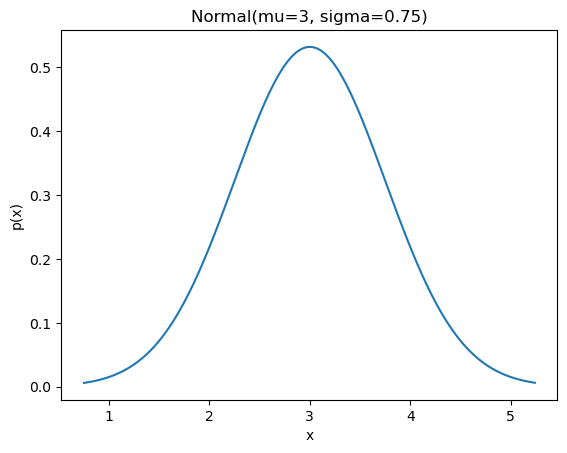

In [33]:
normal.plot()

In [34]:
class Poisson(Distribucion):
    def __init__(self, lam):
        self.lam = lam

    def pmf(self, x):
        return (math.exp(-self.lam) * self.lam ** x) / math.factorial(x)

    def muestra(self):
        S, N = 0, 0
        while S < 1:
            u = random.uniform(0, 1)
            N += 1
            S += - math.log(u) / self.lam
        return N - 1

    def plot(self):
        # Construir valores de 'x'
        xs = []
        x, cdf = 0, 0
        while cdf < 0.999:
            xs.append(x)
            cdf += self.pmf(x)
            x += 1

        # Construir valores de 'y'
        ys = [self.pmf(x) for x in xs]

        plt.vlines(xs, ymin=0, ymax=ys, lw=3)
        plt.xlabel("x")
        plt.ylabel("P(X = x)")
        plt.title(f"Poisson(lam={self.lam})")
        plt.show()

In [35]:
poisson = Poisson(3)
poisson.muestra()

3

In [36]:
poisson.muestras(5)

[0, 4, 4, 2, 0]

In [37]:
poisson.pmf(3)

0.22404180765538775

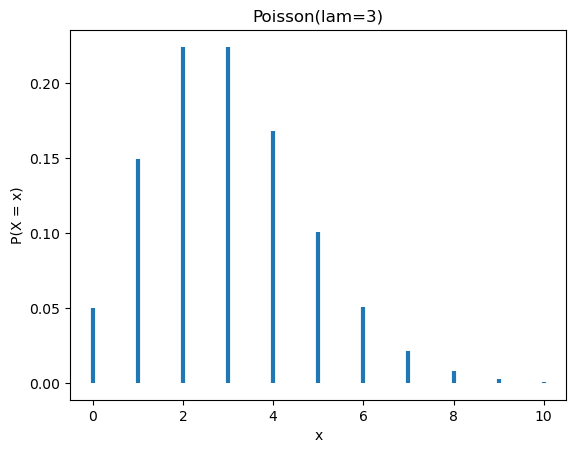

In [38]:
poisson.plot()

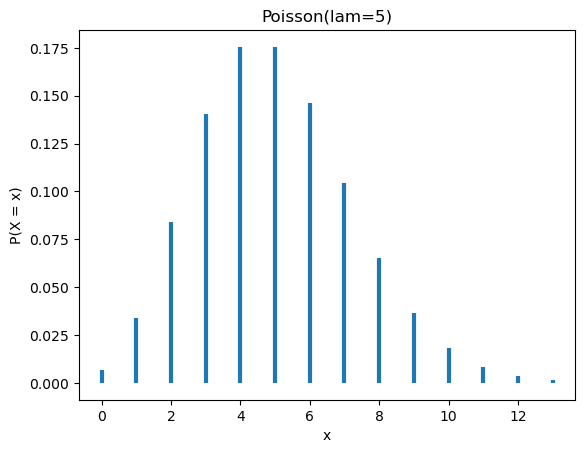

In [39]:
Poisson(5).plot()

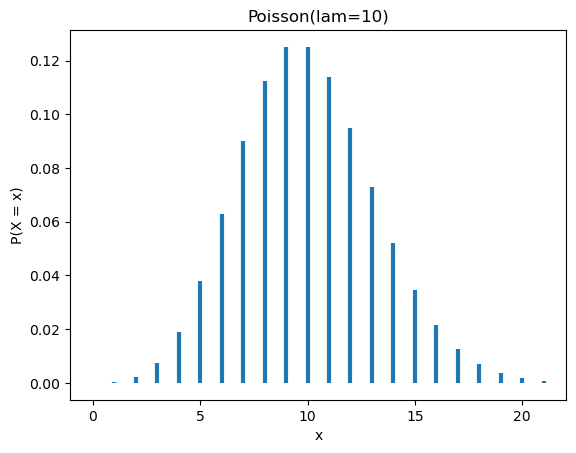

In [40]:
Poisson(10).plot()

In [41]:
class Distribucion(ABC):
    @abstractmethod
    def muestra(self):
        pass

    @abstractmethod
    def plot(self):
        pass

    def muestras(self, n=1):
        return [self.muestra() for _ in range(n)]


class Discreta(ABC):
    @abstractmethod
    def pmf(self, x):
        pass

    def crear_grafico(self, xs):
        ys = [self.pmf(x) for x in xs]
        plt.vlines(xs, ymin=0, ymax=ys, lw=3)
        plt.xlabel("x")
        plt.ylabel("P(X = x)")

class Continua(ABC):
    @abstractmethod
    def pdf(self, x):
        pass

    def crear_grafico(self, xs):
        ys = [self.pdf(x) for x in xs]
        plt.plot(xs, ys)
        plt.xlabel("x")
        plt.ylabel("p(x)")

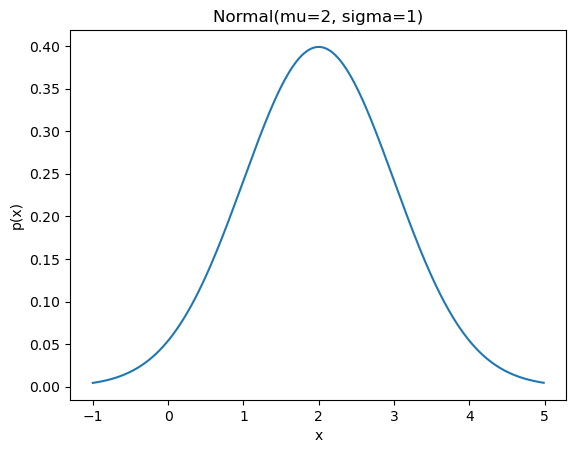

In [42]:
class Normal(Distribucion, Continua):
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def pdf(self, x):
        a = 1 / (self.sigma * (2 * math.pi) ** 0.5)
        b = math.exp( - 0.5 * ((x - self.mu) ** 2 / self.sigma ** 2))
        return a * b

    def muestra(self):
        return random.normalvariate(mu=self.mu, sigma=self.sigma)

    def plot(self):
        x_inicio = self.mu - self.sigma * 3
        x_fin = self.mu + self.sigma * 3
        x_paso = (x_fin - x_inicio) / 500
        xs = [x_inicio + x_paso * i for i in range(500)]
        self.crear_grafico(xs)
        plt.title(f"Normal(mu={self.mu}, sigma={self.sigma})")
        plt.show()

Normal(2, 1).plot()

In [43]:
class Poisson(Distribucion, Discreta):
    def __init__(self, lam):
        self.lam = lam

    def pmf(self, x):
        return (math.exp(-self.lam) * self.lam ** x) / math.factorial(x)

    def muestra(self):
        S, N = 0, 0
        while S < 1:
            u = random.uniform(0, 1)
            N += 1
            S += - math.log(u) / self.lam
        return N - 1

    def plot(self):
        xs = []
        x, cdf = 0, 0
        while cdf < 0.999:
            xs.append(x)
            cdf += self.pmf(x)
            x += 1

        self.crear_grafico(xs)
        plt.title(f"Poisson(lam={self.lam})")
        plt.show()

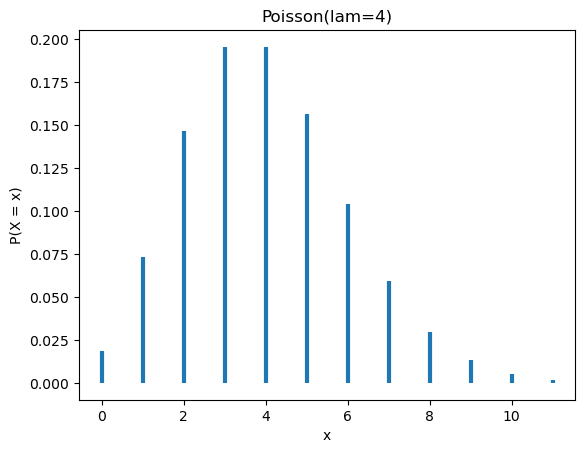

In [44]:
Poisson(4).plot()

::: {.callout-warning}

Algo de herencia múltiple y conflictos de métodos... mostrar un ejemplo y mencionar brevemente el MRO.

:::

## Errores

* Errores
    - Elevacion de errores
    - Implementacion de errores

In [45]:
### Uso de `super()`

class ListaRuidosa(list):
    def append(self, elemento):
        print("Agregando:", elemento)
        super().append(elemento)

lista_ruidosa = ListaRuidosa()
lista_ruidosa

lista_ruidosa.append("¿funciona?")

lista_ruidosa.append("¿y esto?")

lista_ruidosa

l = lista_ruidosa + ["¡no lo puedo creer!"]
l

Agregando: ¿funciona?
Agregando: ¿y esto?


['¿funciona?', '¿y esto?', '¡no lo puedo creer!']